In [128]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

FILE="homo_sapiens_reviewed_NGT20-12"
imputation_option=True

pg_matrix = FILE + ".pg_matrix.tsv"
pr_matrix = FILE + ".pr_matrix.tsv"

df = pd.read_csv(pg_matrix,sep="\t",index_col=0)
df_peptide = pd.read_csv(pr_matrix, sep="\t", index_col=0)
print("protein before decontamination: "+str(df.shape))
#remove proteins from contaminant database
#contaminants=["ALBU_HUMAN", "AMY1A_HUMAN", "AMY1B_HUMAN", "AMY1C_HUMAN", "ANT3_HUMAN", "ANXA5_HUMAN", "B2MG_HUMAN", "BID_HUMAN", "CAH1_HUMAN", "CAH2_HUMAN", "CATA_HUMAN", "CATD_HUMAN", "CATG_HUMAN", "CO5_HUMAN", "CRP_HUMAN", "CYB5_HUMAN", "CYC_HUMAN", "EGF_HUMAN", "FABPH_HUMAN", "GELS_HUMAN", "GSTA1_HUMAN", "GSTP1_HUMAN", "HBA_HUMAN", "HBB_HUMAN", "HBEGF_HUMAN", "IGF2_HUMAN", "IL8_HUMAN", "INHBA_HUMAN", "INHBB_HUMAN", "KCRM_HUMAN", "LALBA_HUMAN", "LEP_HUMAN", "LYSC_HUMAN", "MYG_HUMAN", "NEDD8_HUMAN", "NQO1_HUMAN", "NQO2_HUMAN", "PDGFB_HUMAN", "PPIA_HUMAN", "PRDX1_HUMAN", "RASH_HUMAN", "RET4_HUMAN", "RS27A_HUMAN", "SODC_HUMAN", "SUMO1_HUMAN", "HARS1_HUMAN", "TAU_HUMAN", "THIO_HUMAN", "TNFA_HUMAN", "TRFE_HUMAN", "TRFL_HUMAN", "UB2E1_HUMAN", "UBE2C_HUMAN", "K1C26_HUMAN", "K2C3_HUMAN", "K1C15_HUMAN", "K2C79_HUMAN", "K2C6B_HUMAN", "K1C17_HUMAN", "K2C4_HUMAN", "K2C73_HUMAN", "K2C71_HUMAN", "K2C7_HUMAN", "K2C8_HUMAN", "K1C39_HUMAN", "K1C18_HUMAN", "K1C28_HUMAN", "K1C16_HUMAN", "K2C1_HUMAN", "K2C5_HUMAN", "K2C80_HUMAN", "K2C1B_HUMAN", "K2C75_HUMAN", "K2C6A_HUMAN", "K2C72_HUMAN", "K1C24_HUMAN", "K1C19_HUMAN", "K2C74_HUMAN", "K1C27_HUMAN", "K1C20_HUMAN", "K1C9_HUMAN", "K1C23_HUMAN", "K1C12_HUMAN", "K1C14_HUMAN", "K2C6C_HUMAN", "K1C10_HUMAN", "K1C13_HUMAN", "K22O_HUMAN", "K1C25_HUMAN", "K2C78_HUMAN", "K22E_HUMAN", "K1C40_HUMAN", "KRT85_HUMAN", "KRT38_HUMAN", "KRT34_HUMAN", "KRT86_HUMAN", "KRT35_HUMAN", "KT33B_HUMAN", "KRT81_HUMAN", "KRT37_HUMAN", "KT33A_HUMAN", "KRT83_HUMAN", "K1H1_HUMAN", "KRT82_HUMAN", "K1H2_HUMAN", "KRT36_HUMAN", "KRT84_HUMAN"]
contaminants=["P02768", "P0DUB6", "P0DTE7", "P0DTE8", "P01008", "P08758", "P61769", "P55957", "P00915", "P00918", "P04040", "P07339", "P08311", "P01031", "P02741", "P00167", "P99999", "P01133", "P05413", "P06396", "P08263", "P09211", "P69905", "P68871", "Q99075", "P01344", "P10145", "P08476", "P09529", "P06732", "P00709", "P41159", "P61626", "P02144", "Q15843", "P15559", "P16083", "P01127", "P62937", "Q06830", "P01112", "P02753", "P62979", "P00441", "P63165", "P12081", "P10636", "P10599", "P01375", "P02787", "P02788", "P51965", "O00762", "Q7Z3Y9", "P12035", "P19012", "Q5XKE5", "P04259", "Q04695", "P19013", "Q86Y46", "Q3SY84", "P08729", "P05787", "Q6A163", "P05783", "Q7Z3Y7", "P08779", "P04264", "P13647", "Q6KB66", "Q7Z794", "O95678", "P02538", "Q14CN4", "Q2M2I5", "P08727", "Q7RTS7", "Q7Z3Y8", "P35900", "P35527", "Q9C075", "Q99456", "P02533", "P48668", "P13645", "P13646", "Q01546", "Q7Z3Z0", "Q8N1N4", "P35908", "Q6A162", "P78386", "O76015", "O76011", "O43790", "Q92764", "Q14525", "Q14533", "O76014", "O76009", "P78385", "Q15323", "Q9NSB4", "Q14532", "O76013", "Q9NSB2"]
df = df[~df.index.isin(contaminants)]
print("protein after decontamination: "+str(df.shape))

print("peptide before decontamination:"+str(df_peptide.shape))
df_peptide = df_peptide[~df_peptide.index.isin(contaminants)]
print("peptide after decontamination:"+str(df_peptide.shape))

df_peptide.head(10)


protein before decontamination: (5821, 11)
protein after decontamination: (5779, 11)
peptide before decontamination:(72963, 17)
peptide after decontamination:(72345, 17)


,Protein.Ids,Protein.Names,Genes,First.Protein.Description,Proteotypic,Stripped.Sequence,Modified.Sequence,Precursor.Charge,Precursor.Id,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-2.raw
Protein.Group,,,,,,,,,,,,,,,,,
Q96JP5,Q96JP5,ZFP91_HUMAN,ZFP91,E3 ubiquitin-protein ligase ZFP91,1,AAAAAAAAAVSR,AAAAAAAAAVSR,2,AAAAAAAAAVSR2,88216.50,102652.00,75094.00,68582.10,95678.70,61683.30,111780.00,NaN
P36578,P36578,RL4_HUMAN,RPL4,Large ribosomal subunit protein uL4,1,AAAAAAALQAK,AAAAAAALQAK,2,AAAAAAALQAK2,16180800.00,15868200.00,17843900.00,18364000.00,13058100.00,13606500.00,12413600.00,12902300.00
Q6SPF0,Q6SPF0,SAMD1_HUMAN,SAMD1,Sterile alpha motif domain-containing protein 1,1,AAAAAATAPPSPGPAQPGPR,AAAAAATAPPSPGPAQPGPR,3,AAAAAATAPPSPGPAQPGPR3,3192.01,3109.33,1692.60,NaN,3758.79,NaN,2892.62,1487.02
O76031,O76031,CLPX_HUMAN,CLPX,ATP-dependent Clp protease ATP-binding subunit...,1,AAAAADLANR,AAAAADLANR,2,AAAAADLANR2,152657.00,177147.00,361840.00,223752.00,281743.00,191277.00,NaN,NaN
Q8WUQ7,Q8WUQ7,CATIN_HUMAN,CACTIN,Splicing factor Cactin,1,AAAAALSQQQSLQER,AAAAALSQQQSLQER,2,AAAAALSQQQSLQER2,3736.63,2701.42,4107.73,5362.71,7167.10,7770.59,4453.29,4995.65
A6NIH7,A6NIH7,U119B_HUMAN,UNC119B,Protein unc-119 homolog B,1,AAAAASAAGPGGLVAGK,AAAAASAAGPGGLVAGK,2,AAAAASAAGPGGLVAGK2,NaN,NaN,NaN,NaN,NaN,1892.38,NaN,1371.24
A6NIH7,A6NIH7,U119B_HUMAN,UNC119B,Protein unc-119 homolog B,1,AAAAASAAGPGGLVAGKEEK,AAAAASAAGPGGLVAGKEEK,3,AAAAASAAGPGGLVAGKEEK3,3533140.00,4486020.00,4864100.00,3955770.00,1587450.00,1851170.00,2825540.00,2299300.00
Q9BTD8,Q9BTD8,RBM42_HUMAN,RBM42,RNA-binding protein 42,1,AAAAATVVPPMVGGPPFVGPVGFGPGDR,AAAAATVVPPM(UniMod:35)VGGPPFVGPVGFGPGDR,3,AAAAATVVPPM(UniMod:35)VGGPPFVGPVGFGPGDR3,NaN,NaN,13871.90,NaN,28395.50,27344.40,15739.00,22577.20
Q9P258,Q9P258,RCC2_HUMAN,RCC2,Protein RCC2,1,AAAAAWEEPSSGNGTAR,AAAAAWEEPSSGNGTAR,2,AAAAAWEEPSSGNGTAR2,2624820.00,2113110.00,2068540.00,2155220.00,2034060.00,1860540.00,1824170.00,1873600.00


In [129]:
group_columns = {
    'DMSO': [x for x in df.columns if "DMSO" in x],
    'NGT20-12_1uM': [x for x in df.columns if "NGT20-12_1uM" in x],
    }

print(group_columns)
for key in group_columns:
    print(str(key)+": "+str(len(group_columns[key])))
    for name in group_columns[key]:
        print(name)


{'DMSO': ['Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_DMSO_3-1.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_DMSO_3-2.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_DMSO_4-1.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_DMSO_4-2.raw'], 'NGT20-12_1uM': ['Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_NGT20-12_1uM_1-1.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_NGT20-12_1uM_1-2.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_NGT20-12_1uM_2-1.raw', 'Z:\\Astral Data\\NGT20\\20241125_Jurkat200ng_NGT20-12_1uM_2-2.raw']}
DMSO: 4
Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-1.raw
Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-2.raw
Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-1.raw
Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-2.raw
NGT20-12_1uM: 4
Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-1.raw
Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-2.raw
Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-1.raw
Z:\Astral Data\NGT

In [ ]:
# Imputation & Calculate FC values
import logging
from scipy.stats import truncnorm

logger = logging.getLogger()
logger.setLevel(logging.INFO)  # Set logging level to INFO
for handler in logger.handlers[:]:
    logger.removeHandler(handler)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)
logger.addHandler(console_handler)


def imputation(df, treated_group_name, control_group_name,peptide_count_cutoff=3):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]

    low_1_percentile = np.nanpercentile(df[treated_group].values.flatten(), 1)
    logger.info(f"low_1_percentile in treated group is {low_1_percentile}")

    treated_row_cv = (df.loc[:, treated_group].dropna().std(axis=1) / df.loc[:, treated_group].dropna().mean(axis=1)).mean()
    logger.info(f"mean CV in treated group is {treated_row_cv}")

    peptide_counts = df_peptide.index.value_counts()

    imputation_list = []

    for protein in df.index:
        # Control group handling
        control_values = df.loc[protein, control_group]
        if control_values.isna().sum() >= len(control_group) / 2:
            # Discard this protein
            df.drop(index=protein, inplace=True)
            logger.info(f"Protein {protein} discarded due to missing values in control group.")
            continue
        else:
            # Impute control group based on its own mean and std
            control_mean = control_values.mean(skipna=True)
            control_std = control_values.std(skipna=True)
            missing_indices = control_values.index[control_values.isna()]
            df.loc[protein, missing_indices] = truncnorm.rvs(
                (0 - control_mean) / control_std,  # Lower bound normalized
                np.inf,                           # Upper bound normalized
                loc=control_mean, scale=control_std, size=len(missing_indices))
            logger.debug(f"Imputed missing values in control group for protein {protein}.")

        # Treated group handling
        treated_values = df.loc[protein, treated_group]
        if treated_values.isna().sum() < len(treated_group) / 2:
            # Impute treated group based on its own mean and std
            treated_mean = treated_values.mean(skipna=True)
            treated_std = treated_values.std(skipna=True)
            missing_indices = treated_values.index[treated_values.isna()]
            df.loc[protein, missing_indices] = truncnorm.rvs(
                (0 - treated_mean) / treated_std,  # Lower bound normalized
                np.inf,                           # Upper bound normalized
                loc=treated_mean, scale=treated_std, size=len(missing_indices))
            logger.debug(f"Imputed missing values in treated group for protein {protein}.")
        elif treated_values.isna().sum() >= len(treated_group) / 2:
            if treated_values.isna().sum() == len(treated_group):
                peptide_count = peptide_counts.get(protein, 0)
                if peptide_count > peptide_count_cutoff:
                    if not df_peptide.loc[protein, treated_group].empty:
                        # Perform peptide-level t-test
                        fold_changes = [df_peptide.loc[protein, treated_group].iloc[row].mean(skipna=True) / 
                                        df_peptide.loc[protein, control_group].iloc[row].mean(skipna=True)
                                        for row in range(len(df_peptide.loc[protein]))]
                        p_values = [
                            ttest_ind(
                                df_peptide.loc[protein, treated_group].iloc[row].dropna(),
                                df_peptide.loc[protein, control_group].iloc[row].dropna(),
                                equal_var=True
                            ).pvalue
                            for row in range(len(df_peptide.loc[protein]))
                        ]
                        logger.info(f"Protein {protein} peptide fold changes : {fold_changes}")
                        logger.info(f"Protein {protein} peptide p-values : {p_values}")
                        
                        if np.nanmedian(p_values) < 0.05 or (np.isnan(p_values).all() and not np.isnan(fold_changes).all()):
                            df.loc[protein, treated_group] = np.random.uniform(
                                low=low_1_percentile * 0.5,
                                high=low_1_percentile * 1.5,
                                size=len(treated_group)
                            )
                            imputation_list.append(protein)
                            logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group after significant or NaN p-values.")
                        else:
                            logger.info(f"Protein {protein} has {str(peptide_count)} peptides, but no imputation performed since peptide p-values are not significant, or there is no calculatable fold changes.")
                    else:
                        df.loc[protein, treated_group] = np.random.uniform(
                            low=low_1_percentile * 0.5, 
                            high=low_1_percentile * 1.5, 
                            size=len(treated_group)
                        )
                        imputation_list.append(protein)
                        logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group (no peptide data).")
                else:
                    logger.info(f"Protein {protein} only has {str(peptide_count)} peptides, skipped imputation from minimum.")
            else:
                peptide_count = peptide_counts.get(protein, 0)
                if peptide_count > peptide_count_cutoff:
                    treated_mean = df.loc[protein, treated_group].mean()
                    missing_indices = treated_values.index[treated_values.isna()]
                    df.loc[protein, missing_indices] = truncnorm.rvs(
                        (0 - treated_mean) / treated_row_cv*treated_mean,  # Lower bound normalized
                        np.inf,                           # Upper bound normalized
                        loc=treated_mean, scale=treated_row_cv*treated_mean, size=len(missing_indices))
                    imputation_list.append(protein)
                    logger.info(f"Protein {protein} has {str(peptide_count)} peptides, missing values imputed in treated group using CV-based imputation.")
                else:
                    logger.info(f"Protein {protein} only has {str(peptide_count)} peptides, skipped CV-based imputation.")

    logger.info(f"Imputation completed for {treated_group_name} vs {control_group_name}. {len(imputation_list)} proteins with >50% missing value in the treated group were imputed .")
    return df, imputation_list


# Calculate FC value and append to the right side
def calculate_average_FC_value(df, treated_group_name, control_group_name):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]
    
    control_avg = df[control_group].mean(axis=1)
    treated_avg = df[treated_group].mean(axis=1)
    
    FC_values = treated_avg / control_avg
    
    FC_column_name = f'FC_{treated_group_name}_vs_{control_group_name}'
    df[FC_column_name] = FC_values
    
    log2FC_values = np.log2(FC_values)
    
    log2FC_column_name = f'log2FC_{treated_group_name}_vs_{control_group_name}'
    df[log2FC_column_name] = log2FC_values
    
    return df

# Calculate FC values for PS10_200nM vs DMSO and PS10NW_200nM vs DMSO
reference_group = "DMSO"


imputation_dict={}
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        if imputation_option:
            df, imputation_list = imputation(df, key, reference_group)  # Only proteins with >half missing values in treated group are in the imputation list
            imputation_dict[key] = imputation_list
        df = calculate_average_FC_value(df, key, reference_group)

print(imputation_dict)
df.to_csv("imputation.csv")
df.head()

In [131]:
# Function to perform a student t-test
def student_t_test(row, treated_group_name, control_group_name,min_valid_value=3): # valid value = Not NaN
    treated_values = pd.to_numeric(row[group_columns[treated_group_name]], errors='coerce').dropna().values
    control_values = pd.to_numeric(row[group_columns[control_group_name]], errors='coerce').dropna().values
    
    if not imputation_option:
        if len(treated_values) <min_valid_value or len(control_values) <min_valid_value:
            return np.nan
    
    return ttest_ind(treated_values, control_values, equal_var=True).pvalue

# Iterate over group_columns to calculate p-values
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        pvalue_column_name = f'Pvalue_{key}_vs_{reference_group}'
        df[pvalue_column_name] = df.apply(
            student_t_test,
            axis=1,
            treated_group_name=key,
            control_group_name=reference_group
        )


# Display the updated DataFrame
df.head()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-2.raw,FC_NGT20-12_1uM_vs_DMSO,log2FC_NGT20-12_1uM_vs_DMSO,Pvalue_NGT20-12_1uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,
A0A024RBG1,NUD4B_HUMAN,NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,858264.0,1135030.0,1.021330e+06,774621.0,976261.0,1528420.0,1.563910e+06,1715570.0,1.526468,0.610197,0.032955
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,36930.3,33848.9,2.810040e+04,46597.2,41042.3,33407.9,4.537360e+04,44622.9,1.130398,0.176831,0.355591
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,5663770.0,5725900.0,5.447260e+06,4804850.0,3920210.0,2578480.0,2.185444e+06,2483440.0,0.516019,-0.954503,0.000996
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,520819.0,630068.0,6.029518e+05,617652.0,414303.0,456709.0,4.214093e+05,481192.0,0.747890,-0.419103,0.002178
A0A0B4J237;P01737,TVA82_HUMAN;TVA84_HUMAN,TRAV8-2;TRAV8-4,T cell receptor alpha variable 8-2,107144.0,135649.0,8.883250e+04,69106.9,73140.0,128250.0,1.153620e+05,98788.2,1.036952,0.052349,0.847834


In [132]:
# Apply Benjamini-Hochberg FDR correction, handling NaN values
def apply_bh_fdr(p_values):
    mask = np.isfinite(p_values)
    p_values_corrected = np.full(p_values.shape, np.nan)
    p_values_corrected[mask] = multipletests(p_values[mask], method='fdr_bh')[1]
    return p_values_corrected

# Apply BH FDR correction for each set of p-values
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        bhFDR_column_name = f'bh_FDR_{key}_vs_{reference_group}'
        df[bhFDR_column_name] = apply_bh_fdr(df[f'Pvalue_{key}_vs_{reference_group}'])


df.head()


,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_3-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_DMSO_4-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_1-2.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-1.raw,Z:\Astral Data\NGT20\20241125_Jurkat200ng_NGT20-12_1uM_2-2.raw,FC_NGT20-12_1uM_vs_DMSO,log2FC_NGT20-12_1uM_vs_DMSO,Pvalue_NGT20-12_1uM_vs_DMSO,bh_FDR_NGT20-12_1uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,
A0A024RBG1,NUD4B_HUMAN,NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,858264.0,1135030.0,1.021330e+06,774621.0,976261.0,1528420.0,1.563910e+06,1715570.0,1.526468,0.610197,0.032955,0.137801
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,36930.3,33848.9,2.810040e+04,46597.2,41042.3,33407.9,4.537360e+04,44622.9,1.130398,0.176831,0.355591,0.560768
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,5663770.0,5725900.0,5.447260e+06,4804850.0,3920210.0,2578480.0,2.185444e+06,2483440.0,0.516019,-0.954503,0.000996,0.020490
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,520819.0,630068.0,6.029518e+05,617652.0,414303.0,456709.0,4.214093e+05,481192.0,0.747890,-0.419103,0.002178,0.030215
A0A0B4J237;P01737,TVA82_HUMAN;TVA84_HUMAN,TRAV8-2;TRAV8-4,T cell receptor alpha variable 8-2,107144.0,135649.0,8.883250e+04,69106.9,73140.0,128250.0,1.153620e+05,98788.2,1.036952,0.052349,0.847834,0.919219


In [133]:
df.to_csv(FILE.split(".")[0]+"_analyzed.csv")


In [134]:
# Volcano Plot
import matplotlib.pylab as plt
import seaborn as sns
from adjustText import adjust_text

def volcano_plot(treatment_group, control_group, logFC_cutoff=1, logFC_cutoff2=None, FDR_cutoff=0.05, file_suffix="", highlight_genes=[], protein_level_cutoff=None, xlim=[], imputation_option=imputation_option):
    logFC="log2FC_"+treatment_group+"_vs_"+control_group
    FDR="bh_FDR_"+treatment_group+"_vs_"+control_group
    plt.figure(figsize=(12, 9))

    plt.scatter(x=df[logFC],y=df[FDR].apply(lambda x:-np.log10(x)),s=1, color="grey")

    down = df[(df[logFC]<=-logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    if logFC_cutoff2:    
        slight_down = df[(df[logFC]>-logFC_cutoff) & (df[logFC]<=-logFC_cutoff2)&(df[FDR]<=FDR_cutoff)]
    else:
        slight_down = None

    up = df[(df[logFC]>=logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    
    plt.scatter(x=up[logFC],y=up[FDR].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

    if not (logFC_cutoff2 or protein_level_cutoff):
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    
    if logFC_cutoff2:
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label=">50% Down-regulated",color="blue")
        plt.scatter(x=slight_down[logFC],y=slight_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="30-50% Down-regulated",color="turquoise")
    
    if protein_level_cutoff:
        lowabundance_down=df[(df[logFC]<=-logFC_cutoff) & (df[FDR]<=FDR_cutoff) & (df[group_columns[control_group]].mean(axis=1)<1000)]
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
        plt.scatter(x=lowabundance_down[logFC],y=lowabundance_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated, protein level<"+str(protein_level_cutoff),color="turquoise")

    if highlight_genes:
        highlight = df.loc[highlight_genes]
        plt.scatter(x=highlight[logFC], y=highlight[FDR].apply(lambda x:-np.log10(x)), color='green')
    else:
        highlight = None

    if imputation_option:
        imputation_proteins = df.loc[imputation_dict[treatment_group]]
        plt.scatter(x=imputation_proteins[logFC], y=imputation_proteins[FDR].apply(lambda x:-np.log10(x)), s=3, color='orange', label="Imputation from missing value")
    else:
        imputation_proteins = None
    
    texts=[]
    for i,r in pd.concat([up,down,slight_down,highlight]).drop_duplicates().iterrows():
        #texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=i.split("_")[0]))
        texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=r['Genes'], size=14))

    
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(-0.5,5.5)

    plt.ylabel("-logFDR", size=16)
    plt.title(logFC.split("_", maxsplit=1)[1]+"\nn="+str(len(df[FDR].dropna())),size=24)
    plt.axvline(-logFC_cutoff,color="grey",linestyle="--")
    if logFC_cutoff2:
        plt.axvline(-logFC_cutoff2,color="grey",linestyle="--") 
    plt.axvline(logFC_cutoff,color="grey",linestyle="--")
    plt.axhline(-np.log10(FDR_cutoff),color="grey",linestyle="--")
    plt.legend(loc="upper right", fontsize=16)
    logFC=logFC[:3]+"\u2082"+logFC[4:]
    plt.xlabel(logFC, labelpad=10, size=16)


    adjust_text(texts, force_text=(0.5,1),force_static =(1,2),arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    imputation_suffix="_no_imputation"
    if imputation_option:
        imputation_suffix="_imputation"
    rep_suffix="_"+str(len(group_columns[reference_group]))+"rep"
    plt.savefig(logFC+file_suffix+imputation_suffix+rep_suffix+'.png', transparent=True)



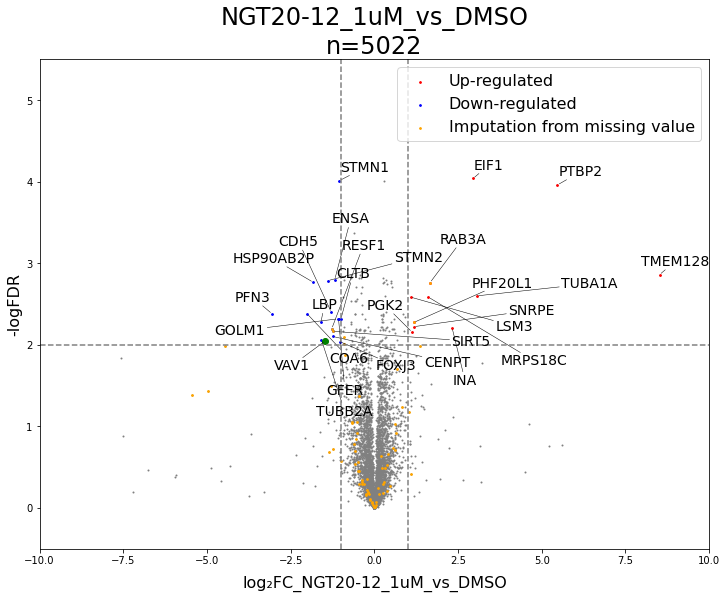

In [135]:
# volcano plot time!!
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        volcano_plot(key, reference_group, FDR_cutoff=0.01, highlight_genes=["P15498"], xlim=[-10,10], file_suffix="")

In [136]:
df = pd.read_csv(FILE.split(".")[0]+"_analyzed.csv",sep=",",index_col=0)

# Bubble plot table for x=treatment, y=protein, color=FC, size=FDR
df.head()
df = df.drop(columns=df.filter(like="10uM").columns)


# Identify log2FC and bh_FDR columns
log2FC_columns = df.filter(regex="^log2FC_").columns
bh_FDR_columns = df.filter(regex="^bh_FDR_").columns

# Extract suffixes for pairing
log2FC_suffixes = [col.split("_", 1)[1] for col in log2FC_columns]
bh_FDR_suffixes = [col.split("_", 2)[2] for col in bh_FDR_columns]

print(log2FC_suffixes)
print(bh_FDR_suffixes)

# Create a mask for filtering rows
mask = pd.DataFrame(
    {
        suffix: (df[f"log2FC_{suffix}"] < -1) & (df[f"bh_FDR_{suffix}"] < 0.01)
        for suffix in log2FC_suffixes
    }
).any(axis=1)

# Apply the mask to filter rows
df_protein_downreg = df[mask]
df_protein_downreg.shape



['NGT20-12_1uM_vs_DMSO']
['NGT20-12_1uM_vs_DMSO']


(17, 15)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  # Use KMeans for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, set_link_color_palette
from matplotlib.colors import rgb2hex
import numpy as np
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def bubble_dendro_plot(df_protein_downreg, SAR, SAR_suffix="", fig_width=50, fig_height=25, dendro_bubble_height_ratio=[1,3], bubble_legend_width_ratio=[20,1]):

    df_protein_downreg["Description_Genes"] = (
    df_protein_downreg["First.Protein.Description"] .fillna("")+ " | " + df_protein_downreg["Genes"].fillna("")
    )

    # Melt the DataFrame for plotting
    melted_log2FC = pd.melt(
        df_protein_downreg,
        id_vars=["Description_Genes"],
        value_vars=[col for col in df_protein_downreg.columns if col.startswith("log2FC")],
        var_name="log2FC_Column",
        value_name="log2FC",
    )
    
    # Add suffix for SAR list
    for key in SAR:
        SAR[key] = list(map(lambda s: s + SAR_suffix, SAR[key]))

    suffix_to_group = {suffix: cluster for cluster, suffixes in SAR.items() for suffix in suffixes}

    melted_log2FC["Suffix"] = melted_log2FC["log2FC_Column"].str.split("_", n=1).str[1]
    melted_log2FC["Group"] = melted_log2FC["Suffix"].map(suffix_to_group)
    
    # Map bh_FDR values and calculate -log10 scale
    melted_log2FC["bh_FDR"] = melted_log2FC.apply(
        lambda row: df_protein_downreg[f"bh_FDR_{row['Suffix']}"].iloc[row.name % len(df_protein_downreg)], axis=1
    )
    melted_log2FC["bh_FDR_log10"] = -np.log10(melted_log2FC["bh_FDR"])


    # Pivot to get a matrix of Description_Genes vs. log2FC values for clustering
    pivot_df = melted_log2FC.pivot_table(
        index="Description_Genes",
        columns="Suffix",
        values="log2FC"
    )
    pivot_df = pivot_df.fillna(1)

    # Compute pairwise distances and hierarchical clustering
    distance_threshold = 3.5 # Set your cutoff distance here
    linkage_matrix = linkage(pivot_df, method="ward")  # You can use "average", "complete", etc.

    # Define clusters using a distance threshold
    cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion="distance")

    # Assign cluster labels to the pivot table
    pivot_df["Cluster"] = cluster_labels

    # Map cluster labels back to the original DataFrame
    cluster_mapping = pivot_df["Cluster"].to_dict()
    melted_log2FC["Cluster"] = melted_log2FC["Description_Genes"].map(cluster_mapping)

    # Sort data by cluster (to reorder x-axis based on k-means clusters)
    melted_log2FC["Cluster"] = melted_log2FC["Cluster"].astype(str)  # Convert to string for categorical color coding
    melted_log2FC["Suffix"] = melted_log2FC["Suffix"].astype(str)

    melted_log2FC.to_csv("temp.csv")



    # Create a linkage matrix for hierarchical clustering
    linkage_matrix = linkage(pivot_df, method="ward")
    
    # Create the figure and axis for the subplots
    fig = plt.figure(figsize=(fig_width,fig_height))
    gs = GridSpec(2, 2, figure=fig, height_ratios=dendro_bubble_height_ratio, width_ratios=bubble_legend_width_ratio)
    
    # First subplot for the dendrogram (use position 211 for the first plot)
    ax_dendro = fig.add_subplot(gs[0,0])
    #ax_dendro.axis("off")
    dendro = dendrogram(
        linkage_matrix,
        labels=pivot_df.index,
        leaf_rotation=90,
        distance_sort="ascending",
        color_threshold=0,
        above_threshold_color="black",
        ax=ax_dendro
        )
    # Extract the order of labels (leaf order) for custom coloring
    dendrogram_order = dendro["ivl"]
    
    # Add title and labels
    ax_dendro.set_title("", fontsize=16)
    ax_dendro.set_xticks([])
    ax_dendro.set_ylabel("Distance", fontsize=20)
    
    # Define group_colors for coloring y-axis labels based on SAR
    unique_groups = melted_log2FC["Group"].dropna().unique()  # Groups based on SAR
    group_colors = {group: get_cmap("tab10")(i / len(unique_groups)) for i, group in enumerate(unique_groups)}
    melted_log2FC["Group_Color"] = melted_log2FC["Group"].map(group_colors)
    
    # Re-order y-axis by suffix (based on SAR dictionary)
    ordered_suffixes = [suffix for group in SAR.values() for suffix in group]
    melted_log2FC["Suffix"] = pd.Categorical(melted_log2FC["Suffix"], categories=ordered_suffixes)
    melted_log2FC["Description_Genes"] = pd.Categorical(
        melted_log2FC["Description_Genes"],
        categories=dendrogram_order,
        ordered=True
    )
    melted_log2FC.sort_values(by=["Suffix","Description_Genes"], inplace=True)
    
    melted_log2FC.to_csv("temp.csv")
    
    # Plotting
    ax_bubble = fig.add_subplot(gs[1,0])
    scatter = ax_bubble.scatter(
        melted_log2FC["Description_Genes"],  # x-axis as protein descriptions
        melted_log2FC["Suffix"],  # y-axis as suffixes
        c=melted_log2FC["log2FC"],  # Bubble color by log2FC
        s=melted_log2FC["bh_FDR_log10"] * 500,  # Bubble size proportional to -log10(FDR)
        cmap="coolwarm",  # Color map for log2FC
        alpha=0.7,  # Transparency
        edgecolors="w",
        clip_on=False
    )
    
    # Define colors for each cluster
    unique_clusters = melted_log2FC["Cluster"].unique()
    cluster_colors = {cluster: get_cmap("tab10")(i / len(unique_clusters)) for i, cluster in enumerate(unique_clusters)}
    melted_log2FC["Cluster_Color"] = melted_log2FC["Cluster"].map(cluster_colors)

    # Color y-axis labels based on group mapping (keep y-axis coloring based on SAR)
    x_labels = ax_bubble.get_xticklabels()
    y_labels = ax_bubble.get_yticklabels()
    for label in x_labels:
        description = label.get_text()
        if description in melted_log2FC["Description_Genes"].values:
            cluster_id = melted_log2FC.loc[melted_log2FC["Description_Genes"] == description, "Cluster"].iloc[0]
            label.set_color(cluster_colors[cluster_id])
    for label in y_labels:
        group = label.get_text()
        if suffix_to_group.get(group) in group_colors:
            label.set_color(group_colors[suffix_to_group[group]])
    
    # Colorbar and size legend (same as before)
    ax_empty = fig.add_subplot(gs[0,1])
    ax_empty.axis('off')
    
    gs_nested = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 1], height_ratios=[2, 3])
    ax_cbar = fig.add_subplot(gs_nested[1,:])
    #ax_cbar.axis('off')
    cbar = plt.colorbar(scatter,  cax=ax_cbar, shrink=0.8, location="left", ticklocation="right")
    cbar.set_label("Log2FC Value", fontsize=20, rotation=270, labelpad=30)
    ax_cbar.tick_params(labelsize=18)  # Set tick label size (for horizontal colorbar)
    ax_cbar.set_aspect(5)
    
    ax_legend = fig.add_subplot(gs_nested[0, 0])  # Top nested plot
    ax_legend.axis("off")
    sizes = [1, 2, 3]  # log10(bh_FDR) values
    size_labels = [f"\n\nFDR = {10**-i}\n\n" for i in sizes]
    size_bubbles = [1, 2, 3]  # Corresponding bubble sizes
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=2*np.sqrt(size*500/np.pi), label=label) for size, label in zip(size_bubbles, size_labels)]
    ax_legend.legend(handles=handles, title="", fontsize=16, labelspacing=0.05, borderaxespad=0.8, handleheight=0.2 # Space between axes and legend
                     #handletextpad=3.0,  # Increase padding between handles and text
                     #borderpad=2.0,  # Increase padding inside the legend box
                       # Increase spacing between labels
    )
    
    # Customize x and y labels, title, and layout
    ax_bubble.set_xlabel("")
    ax_bubble.tick_params(axis='x', rotation=60, labelsize=20)
    for label in ax_bubble.get_xticklabels():
        label.set_ha('right')
    ax_bubble.set_xlim(-0.5, len(set(melted_log2FC["Description_Genes"])) - 0.5)
    
    ax_bubble.set_ylabel("")
    ax_bubble.invert_yaxis()
    ax_bubble.tick_params(axis='y', labelsize=20, pad=20)
    
    ax_dendro.set_title("VAV1 Glue Degradome", fontsize=30, pad=10)
    ax_bubble.grid(True, linestyle="--", alpha=0.5)
    
    for spine in ax_bubble.spines.values():
        spine.set_visible(False)
    
    plt.subplots_adjust(hspace=0.01, wspace=0.01)  # Adjust the vertical space between the subplots
    
    plt.tight_layout()
    plt.savefig("bubble_plot.png",dpi=300)
    plt.show()
    


In [ ]:
# Example SAR dictionary and DataFrame setup (unchanged)
SAR = {
    "benzene": ["NGT20-11", "NGT20-12", "NGT20-19", "NGT20-110", "NGT20-111"],
    "thiophene": ["NGT20-13", "NGT20-14", "NGT20-117", "NGT20-118"],
    "pyridine": ["NGT20-15", "NGT20-16", "NGT20-113", "NGT20-114"],
    "pyrimidine": ["NGT20-17", "NGT20-18"],
    "indole": ["NGT20-119", "NGT20-120"],
}

#melted_log2FC, pivot_df = dendro_preprocessing(df_protein_downreg,SAR=SAR, SAR_suffix="_1uM_vs_DMSO")
#melted_log2FC
#bubble_dendro_plot(melted_log2FC=melted_log2FC, pivot_df=pivot_df, SAR=SAR, SAR_suffix="")
bubble_dendro_plot(df_protein_downreg=df_protein_downreg, SAR=SAR, SAR_suffix="_1uM_vs_DMSO")